In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/user/Desktop/Case_Studies/New_Case_Study/Student Depression Dataset.csv')
df.shape

(27901, 18)

In [3]:
# !pip install seaborn
df.head(5)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
older_depressed_df = df.query('Depression ==1 and Age >=30').groupby('Gender').size()
younger_depressed_df = df.query('Depression ==1 and Age <30').groupby('Gender').size()


older_depressed_df






Gender
Female    1320
Male      1648
dtype: int64

Text(0.5, 1.0, 'Students 30 and over who are Depressed')

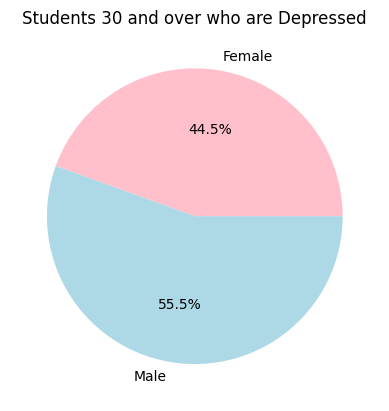

In [5]:
# Create the pie chart

colors = ["Pink", "LightBlue"]
label = ["Female", "Male"]
older_depressed_df.plot(kind="pie",autopct='%1.1f%%', colors=colors)
# older_depressed_df.plot(kind="pie",autopct='%1.1f%%', colors=colors)
plt.title('Students 30 and over who are Depressed')

Text(0.5, 1.0, 'Students under 30 who are Depressed')

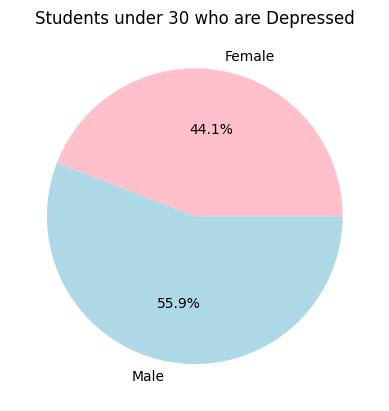

In [6]:
# Create the pie chart

colors = ["Pink", "LightBlue"]
younger_depressed_df.plot(kind="pie",autopct='%1.1f%%', colors=colors)
# older_depressed_df.plot(kind="pie",autopct='%1.1f%%', colors=colors)
plt.title('Students under 30 who are Depressed')

In [7]:
older_city_depressed_df = df.query('Depression == 1 and Age >= 30').groupby(['City', 'Gender']).size()


older_city_depressed_df



City           Gender
Agra           Female    31
               Male      67
Ahmedabad      Female    53
               Male      57
Bangalore      Female    38
                         ..
Varanasi       Male      35
Vasai-Virar    Female    74
               Male      69
Visakhapatnam  Female    50
               Male      57
Length: 62, dtype: int64

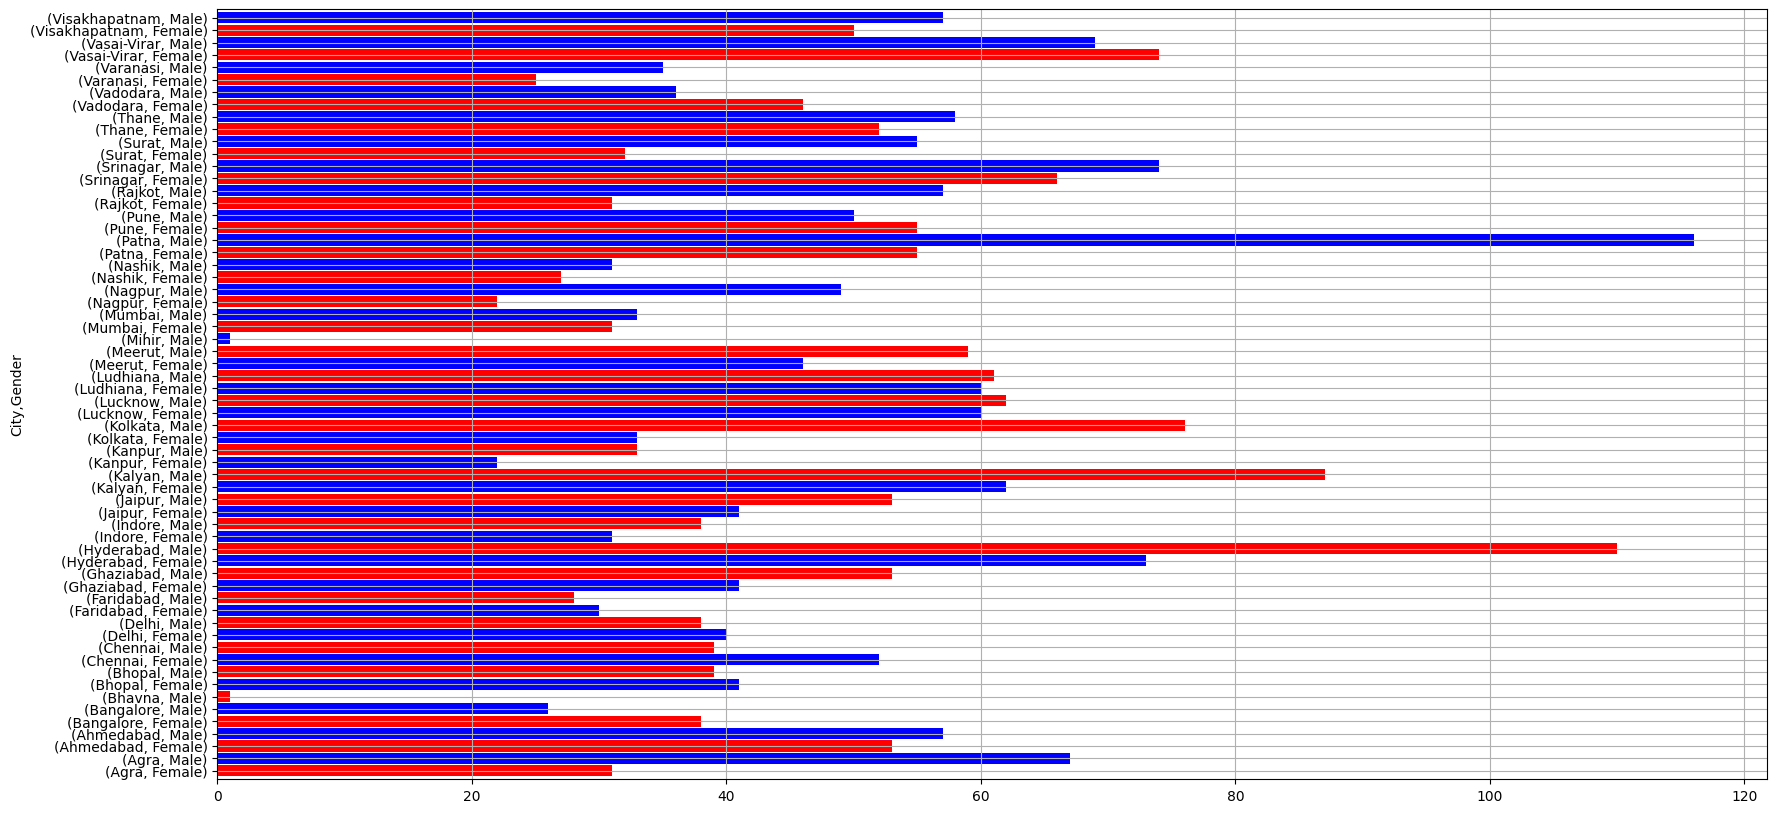

In [8]:
# older_city_depressed_df.plot(kind="bar", logy=True, figsize=(20, 10))

older_city_depressed_df.plot.barh(grid=True, figsize=(20,10), color=["Red", "Blue"], width=0.9, rot=0)

plt.show()

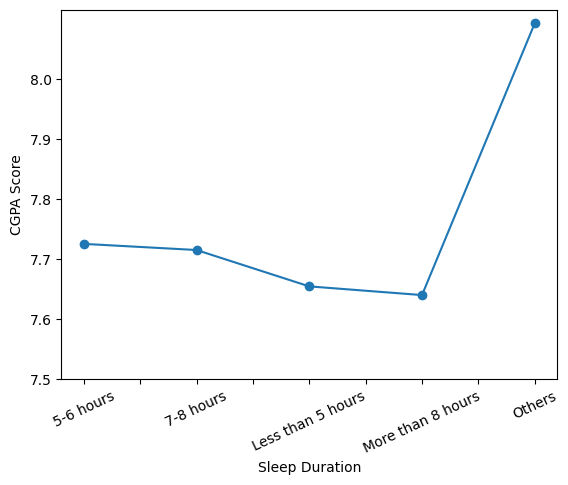

In [9]:
depressed_students = df.query('Depression == 1')
non_depressed_students = df.query('Depression == 0')

sleep_duration_avg = depressed_students.groupby('Sleep Duration')['CGPA'].mean()
sleep_duration_avg.plot.line(marker='o').set_yticks([7.5, 7.6, 7.7, 7.8, 7.9, 8]) 

plt.ylabel('CGPA Score')
plt.xticks(rotation=25)

plt.show()

In [10]:
sleep_duration_avg

Sleep Duration
5-6 hours            7.725365
7-8 hours            7.715161
Less than 5 hours    7.654660
More than 8 hours    7.640205
Others               8.092222
Name: CGPA, dtype: float64

In [196]:
sleep_to_diet = non_depressed_students.groupby(['Sleep Duration', 'Dietary Habits']).size().reset_index()
sleep_to_diet.rename(columns={0:"Count"}, inplace=True)
table = pd.pivot_table(sleep_to_diet, index='Sleep Duration', columns='Dietary Habits', values='Count')
sleep_to_diet
table

Dietary Habits,Healthy,Moderate,Others,Unhealthy
Sleep Duration,,,,
5-6 hours,965.0,1005.0,NaN,696.0
7-8 hours,1069.0,1112.0,1.0,793.0
Less than 5 hours,1094.0,1117.0,3.0,735.0
More than 8 hours,1049.0,1125.0,NaN,792.0
Others,1.0,4.0,NaN,4.0


<Axes: title={'center': 'Non Depressed Students Eating Habits Count'}, xlabel='Sleep Duration'>

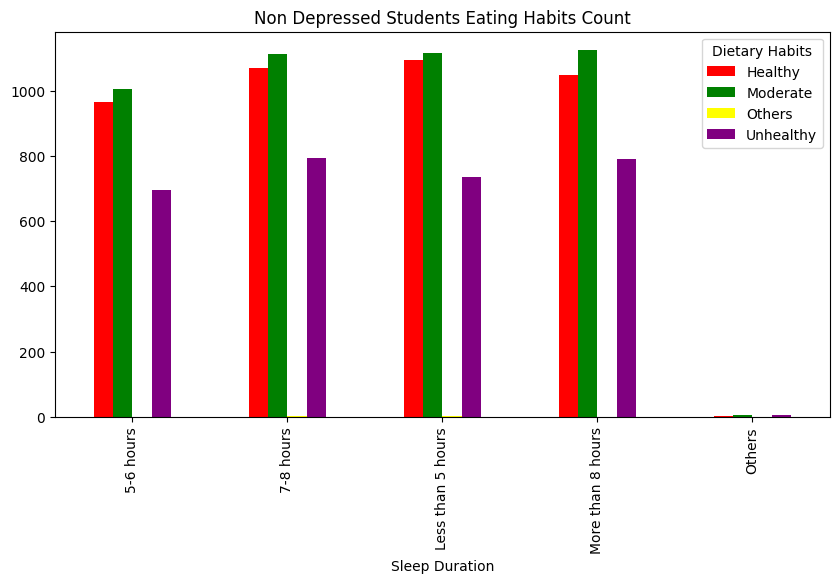

In [195]:

table.plot(kind='bar', color=['red', 'green', 'yellow','purple'], title="Non Depressed Students Eating Habits Count", figsize=(10,5))

<Axes: title={'center': 'Depressed Students Eating Habits Count'}, xlabel='Sleep Duration'>

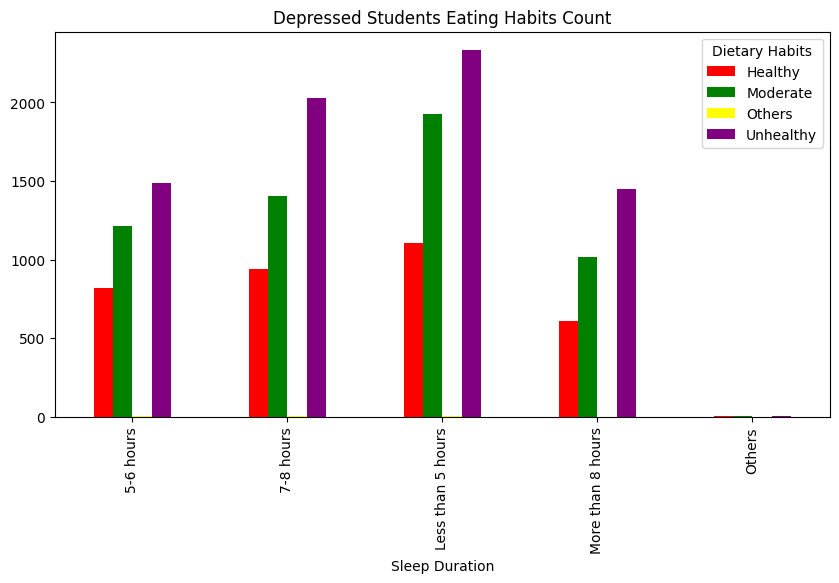

In [197]:
depressed_sleep_to_diet = depressed_students.groupby(['Sleep Duration', 'Dietary Habits']).size().reset_index()
depressed_sleep_to_diet.rename(columns={0:"Count"}, inplace=True)
d_table = pd.pivot_table(depressed_sleep_to_diet, index='Sleep Duration', columns='Dietary Habits', values='Count')
depressed_sleep_to_diet
d_table
d_table.plot(kind='bar', color=['red', 'green', 'yellow','purple'], title="Depressed Students Eating Habits Count", figsize=(10,5))


<Axes: title={'center': 'Depressed Students Satisfied with Study Hours'}>

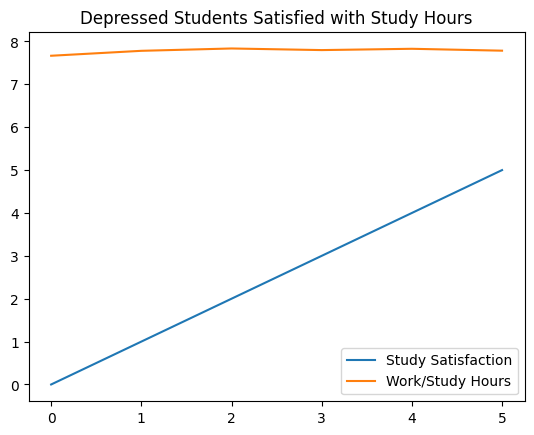

In [ ]:
study_satisfaction = depressed_students[['Study Satisfaction', 'Work/Study Hours']]

study_satisfaction_mean = study_satisfaction.sort_values('Study Satisfaction', ascending=False).groupby(['Study Satisfaction']).mean().reset_index()

# sns.scatterplot(data=study_satisfaction_mean, x='Study Satisfaction', y='Work/Study Hours')
# plt.ylabel("Hours Studying")
# plt.show()

study_satisfaction_mean.plot(kind='line', title='Depressed Students Satisfied with Study Hours')


<Axes: title={'center': 'Non Depressed Students Satisfied with Study Hours'}>

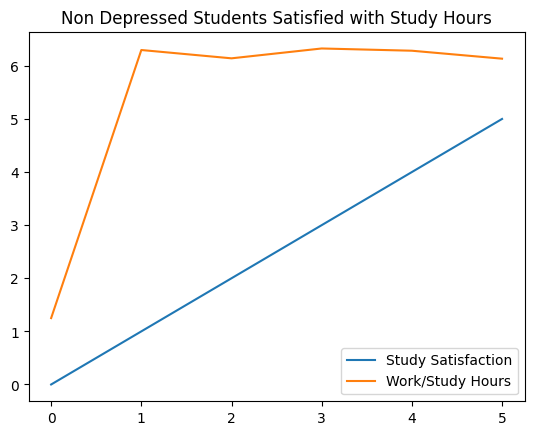

In [14]:
non_depressed_study_satisfaction = non_depressed_students[['Study Satisfaction', 'Work/Study Hours']]

non_depressed_study_satisfaction_mean = non_depressed_study_satisfaction.sort_values('Study Satisfaction', ascending=False).groupby(['Study Satisfaction']).mean().reset_index()

# sns.scatterplot(data=study_satisfaction_mean, x='Study Satisfaction', y='Work/Study Hours')
# plt.ylabel("Hours Studying")
# plt.show()

non_depressed_study_satisfaction_mean

non_depressed_study_satisfaction_mean.plot(kind='line', title='Non Depressed Students Satisfied with Study Hours')

In [28]:
depressed_satisfied_study_score = non_depressed_students[['CGPA', 'Study Satisfaction']].sort_values('Study Satisfaction', ascending=False).groupby(['Study Satisfaction']).mean().reset_index()
depressed_satisfied_study_score

,Study Satisfaction,CGPA
0,0.0,1.387500
1,1.0,7.714511
2,2.0,7.690164
3,3.0,7.606171
4,4.0,7.629315
5,5.0,7.492712


<Axes: title={'center': 'Count of depressed students based on their degree '}, xlabel='Degree'>

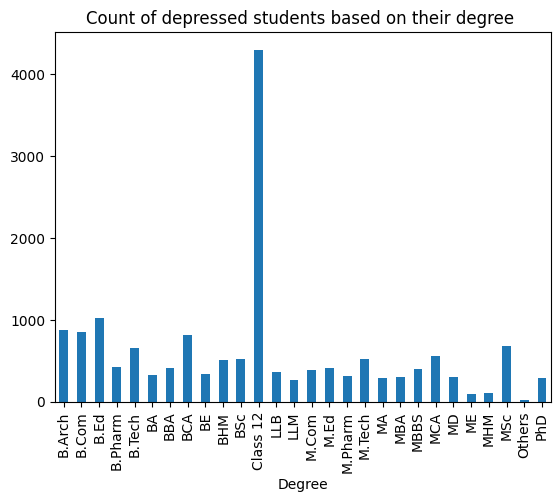

In [47]:
degree_depressed = depressed_students.groupby('Degree').size()

degree_depressed.plot(kind='bar', title='Count of depressed students based on their degree')

<Axes: title={'center': 'Depressed with Suicidal thoughts'}>

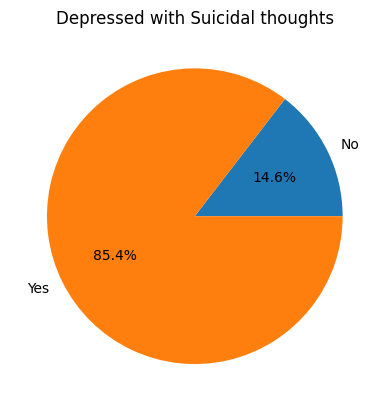

In [203]:
depressed_and_suicidal = depressed_students.groupby('Have you ever had suicidal thoughts ?').size()

depressed_and_suicidal.plot(kind="pie",autopct='%1.1f%%', title='Depressed with Suicidal thoughts')

In [82]:
family_hist = non_depressed_students[['Family History of Mental Illness', 'Depression']]

family_hist = family_hist.groupby('Family History of Mental Illness')['Depression'].count()

family_hist

Family History of Mental Illness
No     6335
Yes    5230
Name: Depression, dtype: int64

<Axes: title={'center': 'Financial Stress as Academic Pressure increases'}, xlabel='Academic Pressure'>

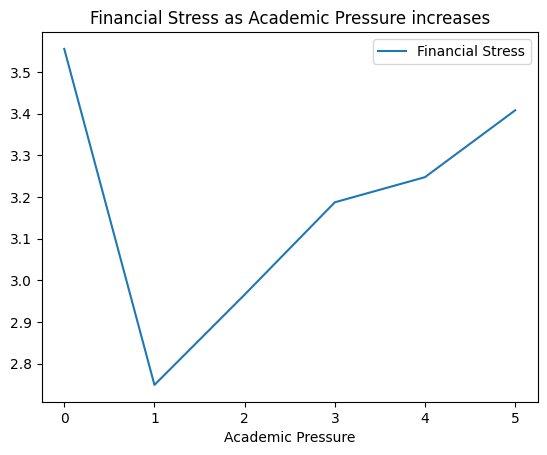

In [121]:
academic_financial = df[['Academic Pressure', 'Financial Stress']]

af = academic_financial.groupby('Academic Pressure').mean()

af.plot(kind='line', title='Financial Stress as Academic Pressure increases')

In [143]:
academic_financial_g = df[['Academic Pressure', 'Financial Stress', 'Gender']]

academic_financial_g = academic_financial_g.groupby(['Gender', 'Academic Pressure']).mean().reset_index()

academic_financial_g


,Gender,Academic Pressure,Financial Stress
0,Female,0.0,3.000000
1,Female,1.0,2.734344
2,Female,2.0,2.943120
3,Female,3.0,3.224629
4,Female,4.0,3.251928
5,Female,5.0,3.404910
6,Male,0.0,4.000000
7,Male,1.0,2.759797
8,Male,2.0,2.983698
9,Male,3.0,3.158903
